# Canopy Openness package working example

### This notebook tests the ImageLoad and FishEye modules in the in-development package

This notebook provides a sample workflow for users using the CanopyOpenness package.

As the package is in development, this notebook will be updated as new modules are written.

Currently the notebook provides a working example for ImageLoad and FishEye modules.

*The output of ImageLoad is a hemispheric photo transformed to black-and-white based on thresholding*

Here white=sky and black=canopy.

*The output of FishEye is the same photo but with calculations of center circle coordinates for fisheye lens*

---

The workflow for the user is as follows:

  - 1) Import package in development and load ImageLoad and FishEye modules
  - 2) Set logging level to debug from loguru
  - 3) Define user inputs for ImageLoad (filepath and filename)
  - 4) Run the ImagePrep class in ImageLoad module 
  - 5) Check that output is correct by running functions to output images
  - 6) Run FishEye class in FishEye module using the output from ImagePrep as input
  - 7) Check output is correct by displaying center coordinates


In [1]:
#Importing Packages
import CanopyOpenness
from CanopyOpenness import ImageLoad
from CanopyOpenness import FishEye

In [2]:
#Setting logging level to debug
CanopyOpenness.set_loglevel("DEBUG")

## Running ImageLoad module

This will load an image and output a thresholded bw photo

In [3]:
#Defining user input
filepath = "./examples/" #where photos are stored
filename = "Sample_Photo.JPG" #one photo

In [4]:
#Saving object from ImagePrep class in ImageLoad module
#This will give us the loaded image, blue transformed, and bw transformed
img = ImageLoad.ImagePrep(filepath, filename)

07:18 | DEBUG   | imageLoad       | loaded image: Sample_Photo.JPG


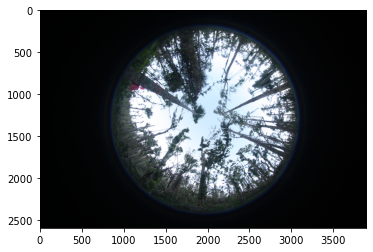

In [6]:
#Checking output of regular image load and logging message
img.imageLoad()

07:18 | DEBUG   | BluePic         | converted image to blue...


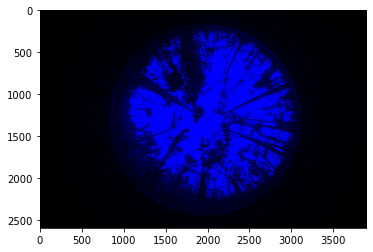

In [7]:
#Checking output of blue-transformed image and logging message
img.BluePic()

07:19 | DEBUG   | bwPic           | converted image to BW ...threshold...


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

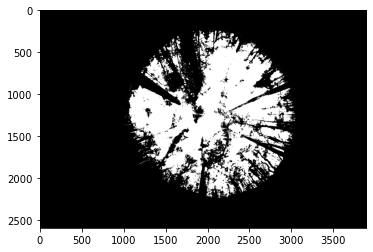

In [14]:
#Checking output of bw-transformed image and logging message
bw = img.bwPic()
bw

## Running FishEye module
This will take the img.bwPic output from ImagePrep above.  
It will then calculate the coordinates of the circle of fisheye lens and set them into the image array

In [15]:
#Running FishEye class on the bw pic
fish = FishEye.FishEye(bw)

07:19 | DEBUG   | SetCircle       | Assuring center fisheye coordinates are above 0


[array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 1944.0,
 1296.0,
 1294.0]

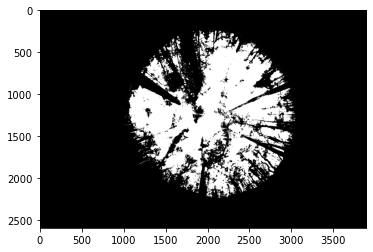

In [17]:
#checking object returned from SetCircle function
fish.SetCircle() #returns bw image array with center coordinates (x,y, and radius) at the end